In this notebook, we're going to actually visualize the learning process of neural networks. We're going going to see a step by step visualization on how neural networks are learning. And in this notebook, we're also going to actually understand the essence of neural networks and how good they are at separating non-linear data(using non-linear activation functions and multiple layers of neurons.).

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

So the package ***torch.nn.functional*** is going to allow us to use the Relu activation function, which is the non-linearity.

***sklearn.datasets*** to load a ready made dataset.

In [2]:
# Now importing the dataset
x,y = sklearn.datasets.make_moons(200, noise=.20)

***sklearn.datasets.make_moons(200, noise=0.20)*** is using the **make_moons** function from the scikit-learn library to generate a synthetic dataset(A synthetic dataset is a dataset that is artificially generated rather than being collected from real-world observations or measurements) with two classes (binary classification) that resembles two crescent-shaped moon patterns. 

**200** is the number of samples or data points to generate.

**noise=0.20** specifies the amount of random noise to be added to the data.

**x** = input = feature matrix;

**y** = expected output = target labels or classes associated with each data point. In this binary classification scenario, y will contain labels that indicate which class (0 or 1) each data point belongs to.

In [3]:
x

array([[ 1.44386074e-01,  1.18208736e+00],
       [-6.86269259e-01,  6.90986738e-01],
       [ 2.28221560e+00,  9.72082630e-01],
       [-2.25572793e-01,  1.19120657e+00],
       [ 1.23329618e-01,  8.05458600e-01],
       [ 1.88198013e+00,  6.12679397e-01],
       [ 5.55041379e-01,  3.58864234e-01],
       [ 4.51536124e-01, -4.92449445e-01],
       [ 8.49713146e-01, -1.89820075e-04],
       [-6.80795480e-01,  8.25037153e-01],
       [-3.60328207e-02, -7.23446415e-02],
       [ 1.48487855e+00, -2.26842862e-01],
       [ 7.21718972e-01, -7.55191175e-01],
       [ 9.07144773e-01, -1.00669361e-01],
       [ 2.82122987e-01, -5.31843024e-01],
       [ 1.41298540e+00,  5.23549668e-01],
       [ 7.61680249e-01, -4.66487397e-01],
       [ 4.92475165e-01,  1.02510629e+00],
       [-1.72895502e-01,  8.24263246e-01],
       [ 3.81842308e-01,  8.10531997e-01],
       [ 2.19017191e+00,  2.57657133e-01],
       [-8.34688795e-01,  3.96353896e-01],
       [ 1.89766804e+00, -1.59078341e-01],
       [ 2.

**x** has two columns, each representing a different feature. These features  represents the coordinates (x and y positions) of each data point on a two-dimensional plane.

In [4]:
y

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1], dtype=int64)

since this is a binary classification problem. **y** has an array of 0 or 1. That means, each 0 or 1 indicate each point on the plane belong to either class 0 or class 1

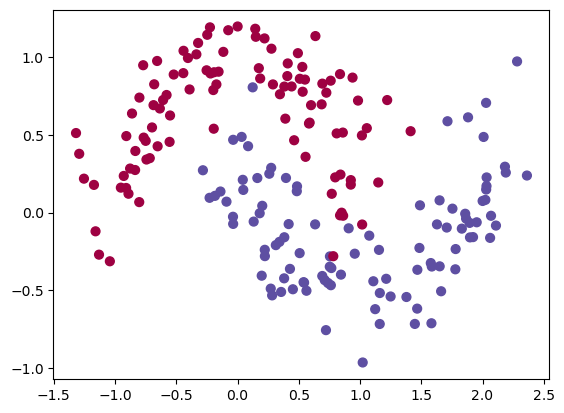

In [5]:
# Let's plot x
plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

As we see the 2 classes can't be seperated by a straight line. So non-linearity is introduced here. And we call them non-linearly seperable. That's where we need to use more complex algorithm rather than just linear or logistic regression.

**x[:,0]** and **x[:,1]** are used for the x and y coordinates of the data points in the plot.

**s=40** sets the size of the data points to be relatively large (size 40).

**c=y** assigns colors to the data points based on the values in the y variable. Each class (0 or 1) is given a different color.

**cmap=plt.cm.Spectral** specifies the color scheme for the plot, with distinct colors for each class.

The resulting plot visually displays data points on a graph, where each point's position is determined by its features (x and y values), and the colors represent which class (0 or 1) each data point belongs to. 

In [7]:
# Convert the dataset into torch tensor.
x = torch.FloatTensor(x)
y = torch.LongTensor(y)

**FloatTensor**: Use this when your data contains decimal numbers or real values. It's suitable for tasks involving measurements, sensor readings, or any data with decimal points.

**LongTensor**: Use this when your data contains whole numbers, typically for tasks like classification where you have discrete class labels represented as integers.

In [8]:
x

tensor([[ 1.4439e-01,  1.1821e+00],
        [-6.8627e-01,  6.9099e-01],
        [ 2.2822e+00,  9.7208e-01],
        [-2.2557e-01,  1.1912e+00],
        [ 1.2333e-01,  8.0546e-01],
        [ 1.8820e+00,  6.1268e-01],
        [ 5.5504e-01,  3.5886e-01],
        [ 4.5154e-01, -4.9245e-01],
        [ 8.4971e-01, -1.8982e-04],
        [-6.8080e-01,  8.2504e-01],
        [-3.6033e-02, -7.2345e-02],
        [ 1.4849e+00, -2.2684e-01],
        [ 7.2172e-01, -7.5519e-01],
        [ 9.0714e-01, -1.0067e-01],
        [ 2.8212e-01, -5.3184e-01],
        [ 1.4130e+00,  5.2355e-01],
        [ 7.6168e-01, -4.6649e-01],
        [ 4.9248e-01,  1.0251e+00],
        [-1.7290e-01,  8.2426e-01],
        [ 3.8184e-01,  8.1053e-01],
        [ 2.1902e+00,  2.5766e-01],
        [-8.3469e-01,  3.9635e-01],
        [ 1.8977e+00, -1.5908e-01],
        [ 2.0009e+00,  7.5049e-02],
        [ 1.0172e+00, -7.6277e-02],
        [-5.5505e-01,  4.5491e-01],
        [-2.5309e-01,  9.1503e-01],
        [ 1.4901e-01,  1.130

In [9]:
y

tensor([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 1, 1, 0, 0, 1, 1, 1])

Now we're going to build and structure our neural network(Input layer, 1 hidden layer and output layer). And to do that we're going to build a class and inside this class, we're going to structure the neural network as well as apply the forward propagation function.

In [10]:
class FeedForward(nn.Module):
    """
    A simple feed-forward neural network with:
      - 1 input layer
      - 1 hidden layer (ReLU activation)
      - 1 output layer (no activation)
    """
    def __init__(self, input_neurons, hidden_neurons, output_neurons): # since we have 3 layers
        super(FeedForward, self).__init__()

        # Now, we are going to start building our layers
        # Linear layer: input → hidden
        self.fc1 = nn.Linear(input_neurons, hidden_neurons)
        # Linear layer: hidden → output
        self.fc2 = nn.Linear(hidden_neurons, output_neurons)
        
        # Activation for hidden layer
        self.relu = nn.ReLU()
        # Note: No activation on output layer; raw scores/logits are returned

    def forward(self, x):
        #the forward function is already included in the module 
        #but we are overriding it to suit our current NN.
        # Pass input through first linear layer
        out = self.fc1(x)
        # Apply ReLU nonlinearity on hidden activations
        out = self.relu(out)
        # Pass through second linear layer to produce outputs
        out = self.fc2(out)
        # Return raw output (no sigmoid or other activation here)
        return out


We've defined our class that defines our neural network, let's create an object of that network.

In [11]:
network = FeedForward(input_neurons = 2, hidden_neurons = 50, output_neurons = 2)
optimizer = torch.optim.SGD(network.parameters(), lr = 0.02)
loss_function = torch.nn.CrossEntropyLoss()

since, we have 2 columns only in x, that means 2 input features. And for this NN we take 50 neurons in hidden layers and since it's a binary classification so there are 2 output neurons.

To use BCELoss, we have to have 1 output neurons. Moreover, it doesn't use the Softmax function. But here, we have 2 output neurons. So we use Cross Entropy which uses softmax function. In PyTorch we don't have to define the softmax function, PyTorch automatically defines it.

Now we're going to train our network. And while we're training it, we're going to visualize the process.

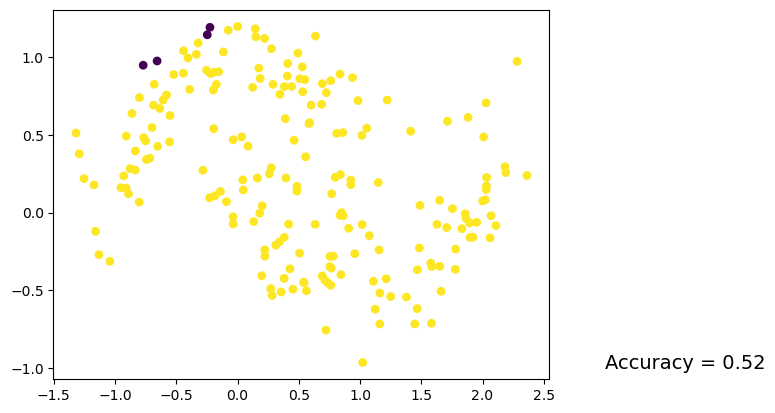

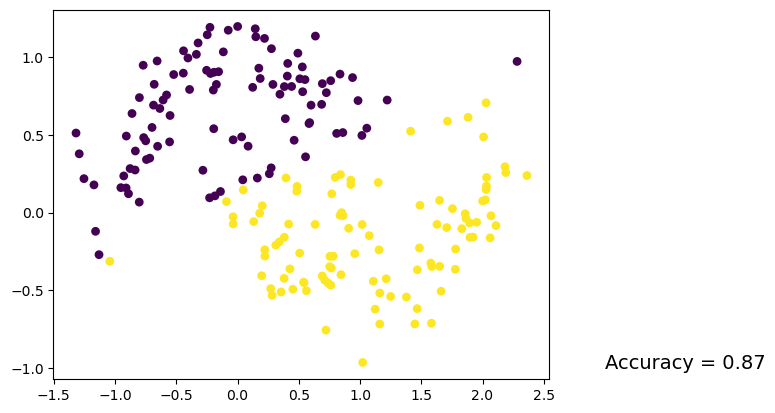

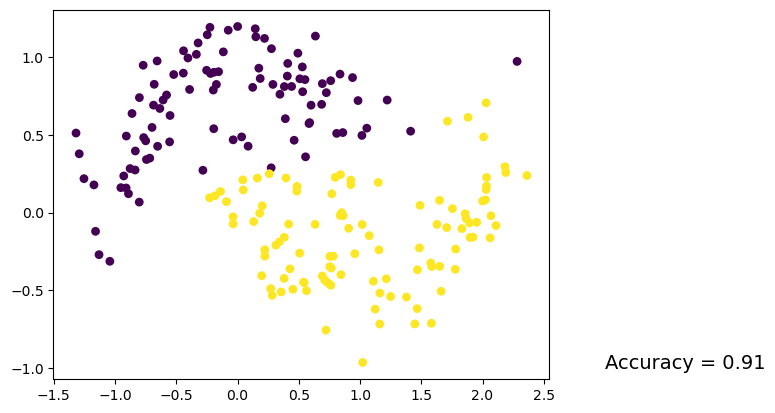

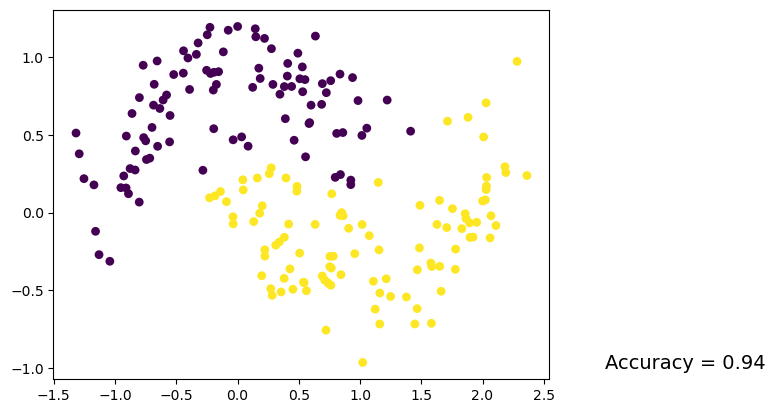

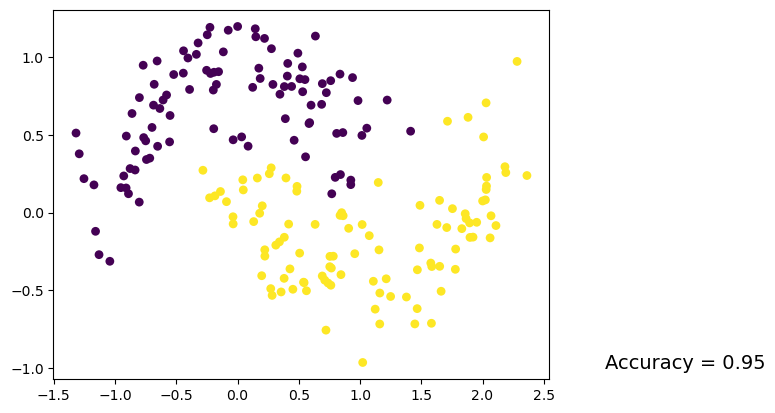

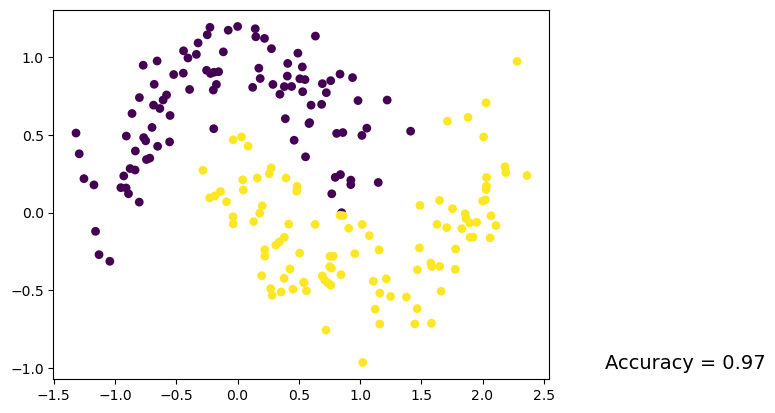

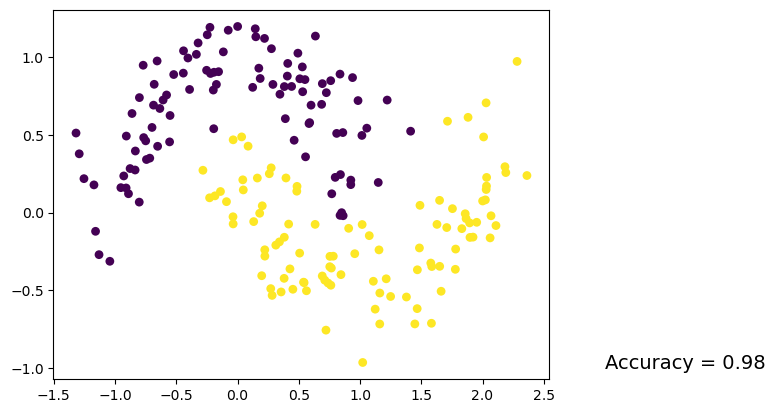

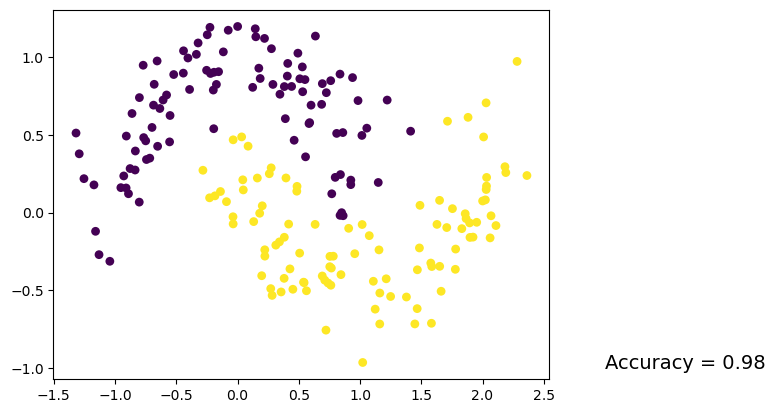

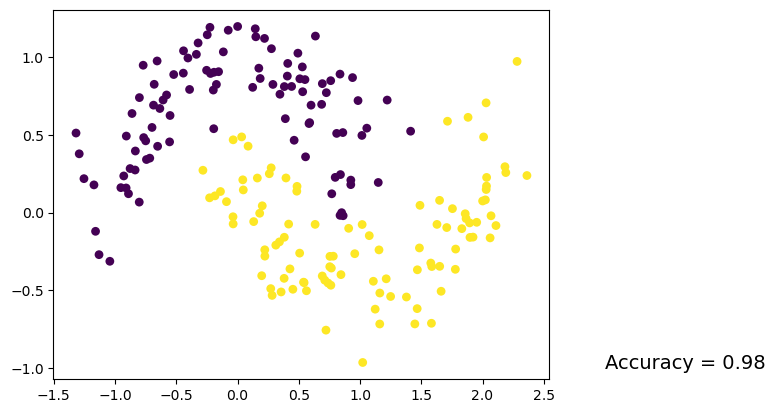

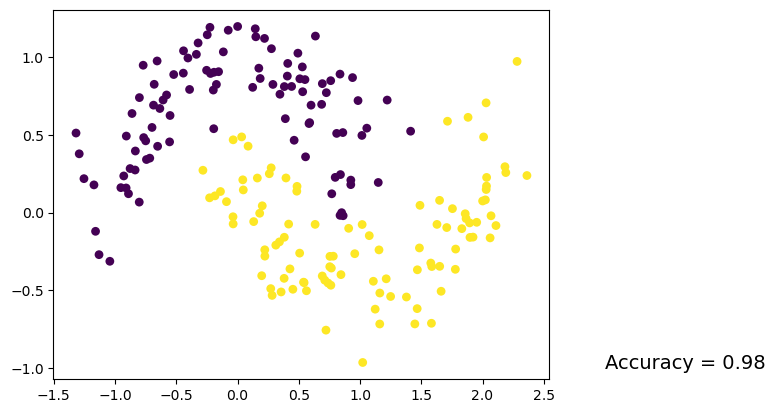

<function matplotlib.pyplot.show(close=None, block=None)>

In [12]:
plt.ion() #interactive mode on to plot the points on the same plot
for epoch in range(10000):
    #forward propagating x by calling the object that we created
    out = network(x)
    
    #calculating the loss
    loss = loss_function(out, y) #predicted=out,actual=y
    
    #backpropagation
    #clearing gradient buffer
    optimizer.zero_grad()
    
    #calculate the gradients
    loss.backward()
    
    #update weights
    optimizer.step()
    
    
    #visualization
    #we want to plot how much our NN progressed after every 1000 epochs
    
    if epoch % 1000 == 0:
        # show the learning process up untill now
        # taking the maximum of our output predictions. 
        # We don't need to calculate it manually since softmax is blended by default in the Cross entropy calculation
        max_value, prediction = torch.max(out,1) #since softmax is distributed across the columns so axis=1, prediction=index of that maximum value
        predicted_y = prediction.data.numpy() #converting torch tensor to numpy array as matplotlib expect a numpy array
        target_y = y.data.numpy() #converting the actual y values to numpy array
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:,1], s=40, c=predicted_y, lw=0 ) #lw=line width
        
        #calculating the accuracy 
        accuracy = (predicted_y == target_y).sum() / target_y.size  #normalizing by dividing because we want the accuracy to be in terms of 0 to 1 and multiply it by 100 to get the percentage
        plt.text(3,-1, 'Accuracy = {:.2f}'.format(accuracy), fontdict = {'size':14})
        plt.pause(0.1)
        
        
plt.ioff()        
plt.show
        
        

So as we can see, the neural network was able to classify these two data very accurately though they are non-linear because they can't be separated by a line. They need to be separated by a curve.

So that is how good our neural networks to separate or classify nonlinear data very.